In [50]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import util
import skimage.io as io
import pandas as pd

import matplotlib.pyplot as plt

In [77]:
# code source https://scikit-image.org/docs/dev/auto_examples/applications/plot_3d_image_processing.html#sphx-glr-auto-examples-applications-plot-3d-image-processing-py
def display(im3d, save_fig,cmap="gray", step=12):
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 14))

    vmin = im3d.min()
    vmax = im3d.max()
    hour=0
    
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_title(str(hour)+" hours")
        ax.set_yticks([])
        frame=hour+step
        hour=hour+1
    fig.savefig("../results/for_presentation/"+save_fig,bbox='tight')    
        
def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)
        
def plot_hist(ax, data, title=None):
    # Helper function for plotting histograms
    ax.hist(data.ravel(), bins=256)
    ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))

    if title:
        ax.set_title(title)


## Read file

(289, 2208, 2752)


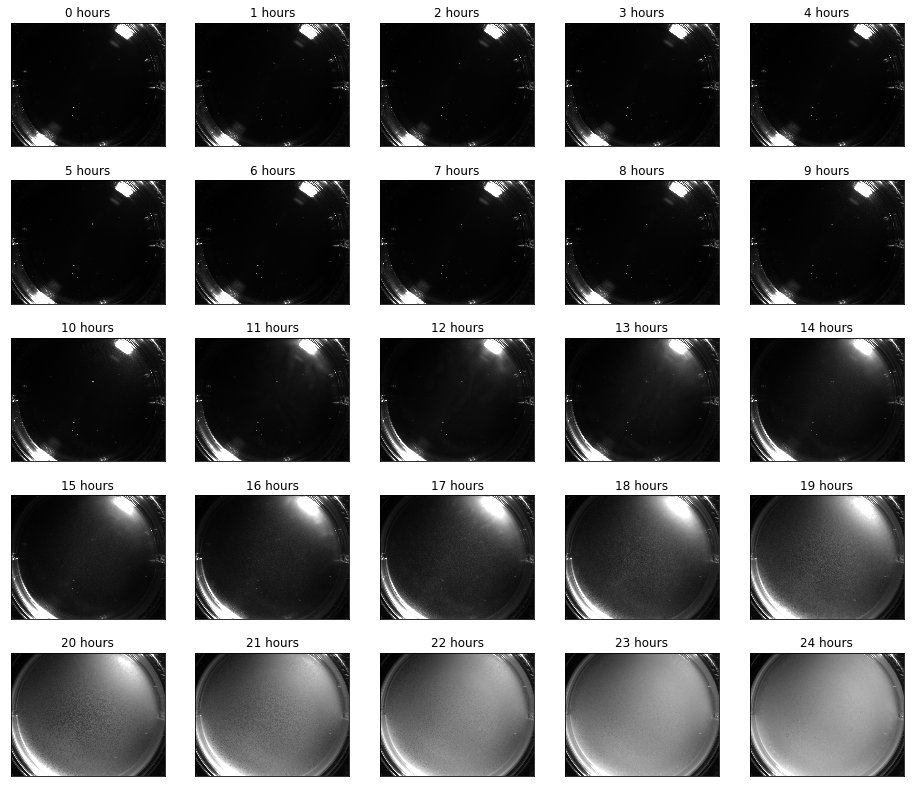

In [78]:
img_EL=io.imread("../data/20200814 Maximes light settings_01 _C=0.tif")
#img_IL=io.imread("../data/37470.tif - C=0.tif")
prefix="20200814 Maximes light settings_01 _C=0"
print(img_EL.shape)
display(img_EL,"Original.png",cmap="gray", step=12)

## Rescale intensity

In [80]:
def rescale_per_frame(img):
    vmin, vmax = np.percentile(img, q=(0.001, 95))
    #print(vmin, vmax)
    img_scaled = exposure.rescale_intensity(img,in_range=(vmin, vmax))
    return img_scaled


img_rescaled=np.zeros_like(img_EL)
for frame in range(img_EL.shape[0]):
    #print(frame)
    img_rescaled[frame,:,:] =rescale_per_frame(img_EL[frame,:,:])
    
    

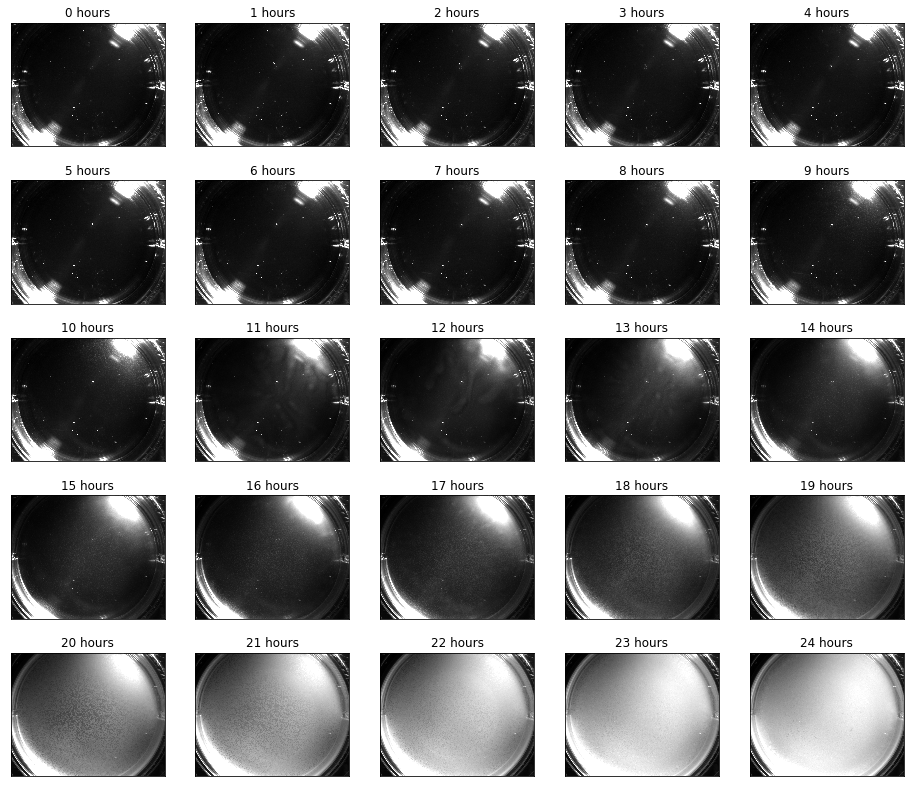

In [85]:
display(img_rescaled,"Rescaled.png",cmap="gray", step=12)

In [86]:
io.imsave("../data/"+prefix+"_rescaled.tif",img_rescaled) 

## Gamma correction

In [87]:
gamma_low_val = 0.5
gamma_low = exposure.adjust_gamma(img_rescaled, gamma=gamma_low_val)
io.imsave("../data/"+prefix+"img_rescaled_gamma_0.5.tif",gamma_low) 

## Cut the region of interest

In [88]:
io.imsave("../data/"+prefix+"_cut_region_corrected.tif",img_rescaled[:,700:1700,1000:2000])
io.imsave("../data/"+prefix+"_cut_region_gamma_corrected.tif",gamma_low[:,700:1700,1000:2000])
#io.imsave("../data/"+prefix+"_cut_region.tif",cut_region)


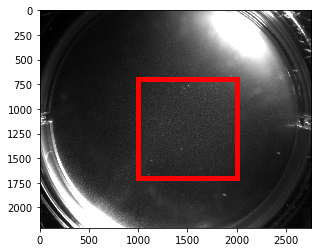

In [92]:
from matplotlib.patches import Rectangle
fig, ax=plt.subplots()

# Create a Rectangle patch
rect =Rectangle((1000,700),1000,1000,linewidth=5,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
ax.imshow(img_rescaled[200,:,:],cmap='gray')
fig.savefig("../results/for_presentation/viz_region_of_interest.png",bbox='tight')